2.51238184297237e-10
0.034055432592000265


NameError: name 'colors' is not defined

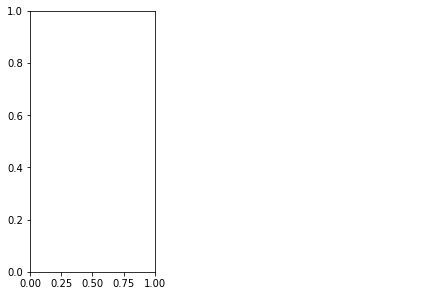

In [3]:
#!/usr/bin/env python
import numpy as np
from astropy.io import fits
#import astropy.constants as const
#import astropy.units as u
#from astropy.coordinates import SkyCoord
#from astropy.coordinates import EarthLocation
#from astropy.wcs import WCS
import pylab as pl
import aplpy
#from matplotlib.colors import ListedColormap
import matplotlib
#from matplotlib import rc
#rc('text', usetex=False)
#rc('font',**{'family':'serif','serif':['Palatino']})
#import matplotlib as mpl
#from matplotlib.colors import ListedColormap
#from matplotlib import colors
#from matplotlib import cm
#import matplotlib.pyplot as plt
#import matplotlib.gridspec as gridspec
#import glob
#from astropy import wcs
#from astropy.cosmology import LambdaCDM
#import os
#import subprocess as sp
import warnings
warnings.filterwarnings("ignore")


dir_fits = '/Volumes/T7/MWA/data/beam_fits/' 
# beam_gaussian_decomp=1   fwhm_gauss_beam=0    fft_beam=1  ---> 101
d_type = ['100','110','101']
mask_type = ['1000','1000','1000']
fitslist = [dir_fits+'beam_'+d_type[0]+'_'+mask_type[0]+'.fits',
            dir_fits+'beam_'+d_type[1]+'_'+mask_type[1]+'.fits',
            dir_fits+'beam_'+d_type[2]+'_'+mask_type[2]+'.fits']
kernel_names = ['Analytic Gaussian decomposition','Analytic matched-FWHM Gaussian',
                'FFT of Gaussian Decomposition']

N = 1400
#u, v = np.mgrid[-N/2*.5/50:N/2*.5/50:.5/50, -N/2*.5/50:N/2*.5/50:.5/50]
u = np.arange(-N/2*.5/50, N/2*.5/50, .5/50)
v = np.arange(-N/2*.5/50, N/2*.5/50, .5/50)
vmin=1e-6
vmax=.035

fig = pl.figure(constrained_layout=True)
spec = fig.add_gridspec(ncols=3, nrows=1)


for col_i in range(3):
    kernel = fits.getdata(fitslist[col_i])
    print(np.min(kernel[np.nonzero(kernel)]))
    print(np.max(kernel))
    
    fx = pl.subplot(spec[col_i])
    pcm = fx.pcolor(u, v, np.abs(kernel),norm=colors.LogNorm(vmin=vmin, vmax=vmax),
                    cmap='Spectral_r')
    #fig.colorbar(pcm, ax=fx)
    #fig.colorbar(pcm, ax=fx).set_label(label='Beam sensitivity (volume normalised)',
    #                         size=18,weight='bold')
    #fig.colorbar().set_label(label='Beam sensitivity (volume normalised)',
    #                         size=18,weight='bold')
    #fig.colorbar(pcm, ax=fx).set_font(size=18)
    fx.set_xlabel('Wavelengths (u)',fontsize=18)
    fx.set_ylabel('Wavelengths (v)',fontsize=18)
    #fig.colorbar.tick_params(labelsize=18) 
    #fig.colorbar.set_font(size=18)
    #fig.colorbar.set_axis_label_font(size=18)
    #fx.axis_labels.set_ytext('Wavelengths (v)')
    #x.axis_labels.set_xtext('Wavelengths (u)')
    fx.tick_params(labelsize=18)
    #fx.axis_labels.set_font(size=18)
    #fx.tick_labels.set_font(size=18)
    fx.title.set_text(kernel_names[col_i])
    a=pl.gca()
    a.tick_params(direction='in', color='k', which='both')

#fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.85, 0.15, 0.05, 0.7])
cbar = fig.colorbar(pcm, cax=cbar_ax,extend='min')
cbar.set_label(label='Beam sensitivity (volume normalised)',size=18,weight='bold')
    
pl.tight_layout()
pl.savefig(dir_fits+'mask1000.png', bbox_inches='tight', dpi=128)
    

NameError: name 'pcm' is not defined

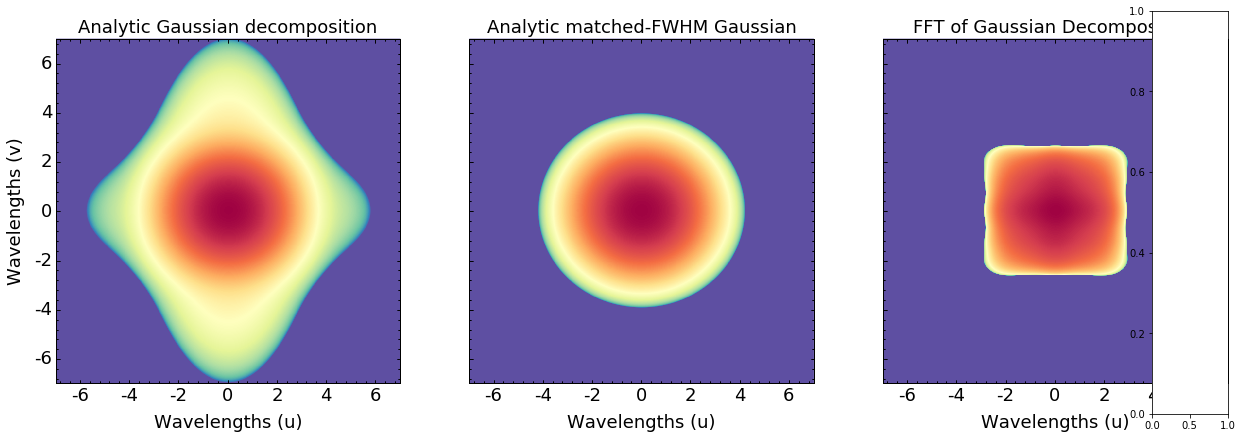

In [4]:
dir_fits = '/Volumes/T7/MWA/data/beam_fits/' 
# beam_gaussian_decomp=1   fwhm_gauss_beam=0    fft_beam=1  ---> 101
d_type = ['100','110','101']
mask_type = ['1000','1000','1000']
fitslist = [dir_fits+'beam_'+d_type[0]+'_'+mask_type[0]+'.fits',
            dir_fits+'beam_'+d_type[1]+'_'+mask_type[1]+'.fits',
            dir_fits+'beam_'+d_type[2]+'_'+mask_type[2]+'.fits']
kernel_names = ['Analytic Gaussian decomposition','Analytic matched-FWHM Gaussian',
                'FFT of Gaussian Decomposition']

#Number of WCS axes: 2
#CTYPE : 'RA---SIN'  'DEC--SIN'  
#CRVAL : 57.8711738586  -26.7476673126  
#CRPIX : 1025.0  1025.0  
#CD1_1 CD1_2  : 0.0559529  0.0  
#CD2_1 CD2_2  : 0.0  0.0559529  
#NAXIS : 2048  2048

for f in fitslist:
    fh = fits.getheader(f)
    fd = fits.getdata(f)

    hitems = ['PC1_3','PC1_4','PC2_3','PC2_4','PC3_1','PC3_2','PC3_3','PC3_4','PC4_1','PC4_2','PC4_3','PC4_4',\
        'CRPIX4','CDELT4','CRVAL4','CTYPE4','CRPIX3','CDELT3','CRVAL3','CTYPE3','CUNIT3','NAXIS4','NAXIS3','CUNIT4']

    for hi in hitems:
        try:
            fh.remove(hi)
        except:
            pass
    fh.set('NAXIS1',1400)
    fh.set('NAXIS2',1400)
    fh.set('WCSAXES',2)
    fh.set('CD1_1',.5/50)
    fh.set('CD2_2',.5/50)
    fh.set('CD2_1',0)
    fh.set('CD1_2',0)
    fh.set('CRPIX1',699)
    fh.set('CRPIX2',699)
    fh.set('CRVAL1',0)
    fh.set('CRVAL2',0)   
    fh.set('CTYPE1','UU')
    fh.set('CTYPE2','VV')  

    fits.writeto(f.replace('.fits','.header.fits'),\
        #fd[:,:], header=fh, overwrite=True)
        fd[:,:], header=fh, overwrite=True)

fitslist = [dir_fits+'beam_'+d_type[0]+'_'+mask_type[0]+'.header.fits',
            dir_fits+'beam_'+d_type[1]+'_'+mask_type[1]+'.header.fits',
            dir_fits+'beam_'+d_type[2]+'_'+mask_type[2]+'.header.fits']

cmap='Spectral_r'#'gnuplot2'#
#N = 1400
#u = np.arange(-N/2*.5/50, N/2*.5/50, .5/50)
#v = np.arange(-N/2*.5/50, N/2*.5/50, .5/50)
#u_mesh, v_mesh = np.meshgrid(u, v)
#u_mesh, v_mesh = w.all_pix2world(u_mesh, v_mesh, 0)

# Plot a 1x3 Figure
fig = pl.figure(figsize=(21,8))
f1 = aplpy.FITSFigure(fitslist[0], figure=fig, subplot=(1,3,1))
#f1.recenter(ra_cent, dec_cent, height=imsz, width=imsz)
f1.show_colorscale(cmap=cmap, stretch='log',vmin=vmin,vmax=vmax)
f1.axis_labels.set_ytext('Wavelengths (v)')
f1.axis_labels.set_xtext('Wavelengths (u)')
#f1.tick_labels.set_yformat('dd')
#f1.tick_labels.set_xformat('hh:mm')
f1.axis_labels.set_font(size=18)
f1.tick_labels.set_font(size=18)
a=pl.gca()
a.tick_params(direction='in', color='k', which='both')
#f1.add_colorbar(location='top')
#f1.colorbar.set_axis_label_text(r'Analytic Gaussian decomposition')
f1.set_title(r'Analytic Gaussian decomposition',size=18)
#f1.colorbar.set_font(size=18)
#f1.colorbar.set_axis_label_font(size=18)
a=pl.gca()
a.tick_params(direction='in', color='k', which='both')

f2 = aplpy.FITSFigure(fitslist[1], figure=fig, subplot=(1,3,2))
f2.show_colorscale(cmap=cmap, stretch='log',vmin=vmin,vmax=vmax)
f2.axis_labels.set_ytext('Wavelengths (v)')
f2.axis_labels.set_xtext('Wavelengths (u)')
f2.axis_labels.set_font(size=18)
f2.tick_labels.set_font(size=18)
f2.axis_labels.hide_y()
f2.tick_labels.hide_y()
a=pl.gca()
a.tick_params(direction='in', color='k', which='both')
#f2.add_colorbar(location='top')
#f2.colorbar.set_axis_label_text(r'Analytic matched-FWHM Gaussian')
f2.set_title(r'Analytic matched-FWHM Gaussian',size=18)
#f2.colorbar.set_font(size=18)
#f2.colorbar.set_axis_label_font(size=18)
a=pl.gca()
a.tick_params(direction='in', color='k', which='both')

f3 = aplpy.FITSFigure(fitslist[2], figure=fig, subplot=(1,3,3))
f3.show_colorscale(cmap=cmap, stretch='log',vmin=vmin,vmax=vmax)
f3.axis_labels.set_ytext('Wavelengths (v)')
f3.axis_labels.set_xtext('Wavelengths (u)')
f3.axis_labels.set_font(size=18)
f3.tick_labels.set_font(size=18)
f3.axis_labels.hide_y()
f3.tick_labels.hide_y()
a=pl.gca()
a.tick_params(direction='in', color='k', which='both')
#f3.add_colorbar(location='right')
#f3.colorbar.set_axis_label_text(r'Beam sensitivity (volume normalised)')
f3.set_title(r'FFT of Gaussian Decomposition',size=18)
#f3.colorbar.set_font(size=18)
#f3.colorbar.set_axis_label_font(size=18)
a=pl.gca()
a.tick_params(direction='in', color='k', which='both')

cbar_ax = fig.add_axes([0.85, 0.15, 0.05, 0.7])
cbar = pl.colorbar(pcm, cax=cbar_ax,extend='min')
cbar.set_label(label='Beam sensitivity (volume normalised)',size=18,weight='bold')

#[left, bottom, right, top]
pl.subplots_adjust(right=0.8)
pl.tight_layout(rect=[0.05, 0, .9, .7])
pl.savefig(dir_fits+'mask1000.png', bbox_inches='tight', dpi=128)